# Practice Problem: Loan Prediction III


<img src="imagens/logo.png"/>

# Entendendo o problema

<img src="imagens/LoanImg.jpg" height="450" width="940"/>

A dream house company é uma empresa que lida com créditos habitacionais, eles tem presença em todas as áreas sejam elas urbanas,rurais ou semi-urbanas.Primeiramente o cliente pede um crédito, e então a empresa analisa se essa pessoa é elegível ou não para receber esse crédito. A empresa deseja automatizar o processo de qualificação de empréstimo com base nos dados fornecidos pelo cliente. Para que seja possível automatizarmos, a empresa nos deu os dados anteriores, de quais pessoas foram ou não foram elegíveis à terem o crédito autorizado.


# Dicionário das variáveis
esse dataset possui 13 colunas, sendo elas:
* Loan_ID: ID único do cliente
* Gender: Gênero do cliente
    * Male: Masculino
    * Female: Feminino
* Married: Status cívil do cliente
    * Y: Yes
    * N: No
* Dependents: Quantidade de dependentes do cliente
    * 0: nenhum dependente
    * 1: Apenas 1 dependente
    * 2: 2 dependentes
    * 3+: 3 ou mais dependentes
* Education: Qual o grau de formação do cliente
    * Graduate: Graduado
    * Not Graduate: Não graduado
* Self_employed: Se o Cliente trabalha por conta própria
    * Yes
    * No
* ApplicantIncome: Mostra a renda do Cliente
* CoapplicantIncome: Renda do colaborador
* LoanAmount: Montante do empréstimo em milhares
* Loan_Amount_Term: Prazo do empréstimo em meses
* Credit_History: histórico de crédito atende às diretrizes
* Property_Area: Urbano / Semi Urbano / Rural
* Loan_Status: crédito foi aprovado?
    * Y: Yes
    * N: No

Como é um desafio para aprender e testar os conhecimentos, os datasets foram separados em 2 arquivos: treino, para treinarmos nosso modelo de ML e teste, para prever quais podem ou não receber crédito.
Para começar iremos importar algumas bibliotecas: como o pandas para o tratamento e visualização de dados,e seaborn e matplotlib que são
para plotagem de gráficos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(10, 8)

In [49]:
# Carregando os arquivos de treino e teste
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [50]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
# veficiando a quantidade de observações e variáveis
train.shape

(614, 13)

In [52]:
# Verificando o total de variáveis e observações
print('               | Observações  | Variáveis')
print(f'Dados de Treino|     {train.shape[0]}     | {test.shape[1]}')
print(f'Dados de Teste |     {test.shape[0]}     | {test.shape[1]}')

| Observações | Variáveis
Dados de Treino|     614     | 12
Dados de Teste |     367     | 12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E750C8CE88>,
      dtype=object)

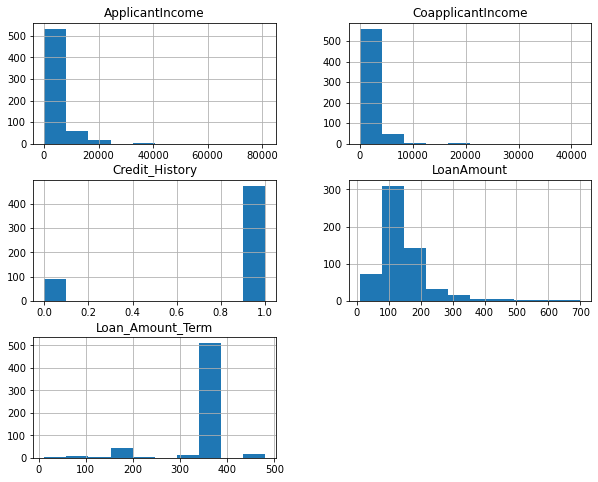

In [53]:
# Obtendo a distribuição das variáveis

train.hist()

In [54]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Verificando Outliers

Text(0.5, 1.0, 'BoxPlot2')

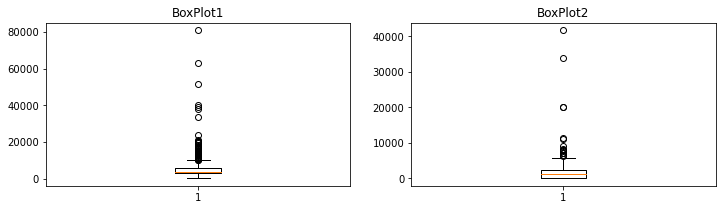

In [55]:
_, axes = plt.subplots(1, 2, figsize=(12,3))

axes[0].boxplot(train['ApplicantIncome'])
axes[0].set_title("BoxPlot1")

axes[1].boxplot(train['CoapplicantIncome'])
axes[1].set_title("BoxPlot2")

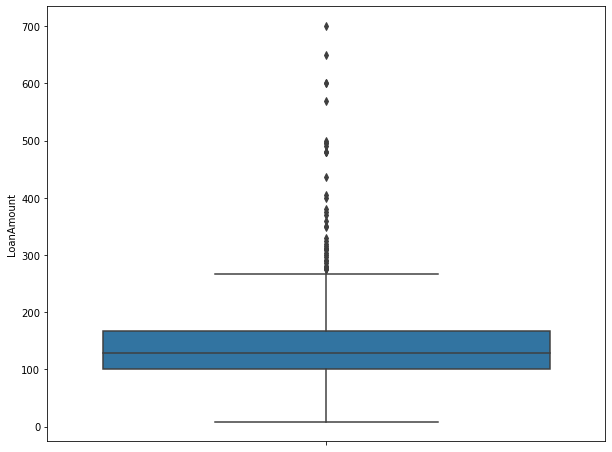

In [56]:
sns.boxplot(y=train['LoanAmount'])

Todos os valores fora da caixa azul, chamada de 'interquartil range', valores fora dos quartis: q1 (25%), q2 (50% ou a média), e q3(75%), são considerados outliers
nesse nosso problema não vamos tratá-los, pois temos poucos exemplos. se fizessemos esse tratamento, teriamos quase 90% dos dados removidos.

# Preparando as variáveis de Treino

os modelos matemáticos de machine learning exigem que os valores sejam números, precisaremos converter as variáveis que sejam strings. Para isso usei a função replace para transformar essas strings em números, e também usei uma função que os cientistas de dados chamam de dummies,é criado uma espécie de tabela verdade, onde os valores únicos dessa coluna se tornam uma coluna e é adicionado 0 ou 1 para cada valor possível da variável. Vamos ver isso! que fica mais fácil de entender.

In [57]:
train = train.replace({'Gender': {'Male': 0, 'Female':1}})
train = train.replace({'Married': {'No': 0, 'Yes':1}})
train = train.replace({'Education': {'Not Graduate': 0, 'Graduate':1}})
train = train.replace({'Self_Employed': {'No': 0, 'Yes':1}})
train = train.replace({'Dependents': {'3+': 3}})
train = train.replace({'Loan_Status': {'Y': 1, 'N': 0}})


In [58]:
# Criando as variaveis Dummies para a coluna Property_Area e Depentents
prop_Area = pd.get_dummies(train['Property_Area'])
prop_Area

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [59]:
# adicionando dummies ao dataframe
train = pd.concat(objs=[train, prop_Area], axis=1)

In [60]:
# Dropa a coluna Property_area
train.drop(['Property_Area'], axis=1, inplace=True)

# Preenchendo dados faltantes

Algumas variáveis as vezes possuem valor NaN que significa **Not a Number**, (não é um número), o modelo matemático não permite valores strings e nem NaN, então precisamos preenche-los ou fazer um 'drop', dependendo da situação ou da variável.
Aqui vemos o total de valores NaN em cada variável.

In [61]:
# Verificando valores nulos 
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

Observei que de todos os valores NaN das colunas, os mais importantes para mim, que talvez sejam primordiais na hora de aprovar ou não aprovar a distribuição do crédito, são: **Self_employed que mostra se o cliente trabalha por conta própria ou não**, e **Gênero**. Eu peguei a média dessas variáveis de acordo com o status de aprovação, **status = 0**  terá uma média diferente do **status = 1**,
A variável Married irei preencher com 0, pois acredito que não importa se a pessoa é casada ou não.
o restante dos valores, podem ser preenchidos com a média deles.

In [62]:
# Preenchendo a média das respectivas variaveis de acordo com o status de Aprovação

train['Self_Employed'] = train.groupby('Loan_Status', sort=False)['Self_Employed'].apply(lambda x: x.fillna(x.mode()[0]))
train['Gender'] = train.groupby('Loan_Status', sort=False)['Gender'].apply(lambda x: x.fillna(x.mode()[0]))

# preenchendo o restante com a médiana
nan_cols = ['Married', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
for c in nan_cols:
    train[c] = train[c].fillna(train[c].mode()[0])

In [63]:
train['Dependents'] = train.Dependents.astype('int64').copy()

In [64]:
train.LoanAmount.fillna(train['LoanAmount'].mode()[0], inplace=True)

In [65]:
# Verificando novamente valores nulos 
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Rural                0
Semiurban            0
Urban                0
dtype: int64

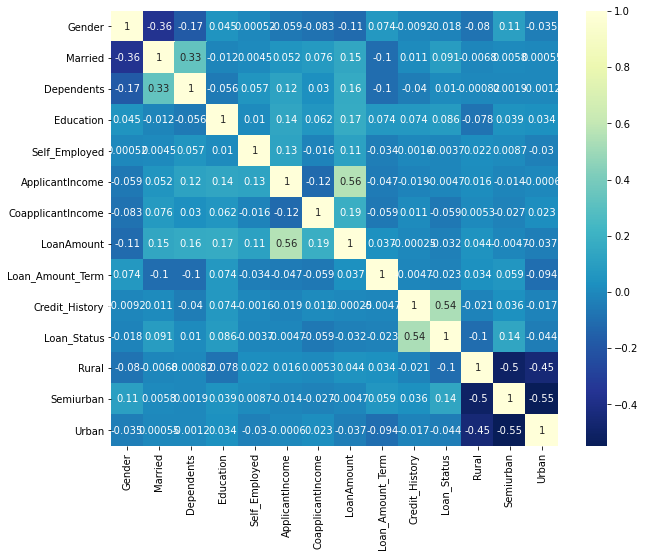

In [66]:
# Verificando a Correlação entre as variáveis

sns.heatmap(train.corr(), cmap='YlGnBu_r', annot=True)

# Preparando as variáveis de teste


In [67]:
test = test.replace({'Gender': {'Male': 0, 'Female':1}})
test = test.replace({'Married': {'No': 0, 'Yes':1}})
test = test.replace({'Education': {'Not Graduate': 0, 'Graduate':1}})
test = test.replace({'Self_Employed': {'No': 0, 'Yes':1}})
test = test.replace({'Dependents': {'3+': 3}})


In [68]:
# Criando as variaveis Dummies para a coluna Property_Area e Depentents
prop_Area = pd.get_dummies(test['Property_Area'])


In [69]:
test = pd.concat(objs=[test, prop_Area], axis=1)

In [70]:
# Dropa a coluna Property_area
test.drop(['Property_Area'], axis=1, inplace=True)

In [71]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

In [72]:
# Como não temos a variavel target para preenchermos as variaveís importantes
# vamos preenche-las com com a médiana delas
nan_cols = ['Gender', 'Self_Employed','Married', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Dependents']
for c in nan_cols:
    test[c] = test[c].fillna(test[c].mode()[0])

In [73]:
test['Dependents'] = test.Dependents.astype('int64').copy()

In [74]:
test.LoanAmount.fillna(test['LoanAmount'].mode()[0], inplace=True)

# Normalizando os dados de teste e treino

Para facilitar o treinamento do modelo é aconselhável normalizar os dados que são muito grandes, para isso, usei uma classe da biblioteca sklearn chamada StandardScaler, ela faz um calculo, onde cada valor da coluna em questão é subtraida pela média dessa coluna e dividida pelo desvio padrão.

In [75]:
# Para Faciliar a normalização irei juntar os 2 dataframes

df = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True)

In [76]:
# irei utilizar o StandardSclaer nas colunas ApplicantIncome, CoapplicantIncome, LoanAmount e Loan_Amount_Term
# Que tem valores altos, onde nosso modelo pode se atrapalhar ao tentar aprender.

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

high_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']

for c in high_cols:
    SS.fit(df[c].values.reshape(-1, 1))
    df[c] = SS.transform(df[c].values.reshape(-1, 1))


In [77]:
df.shape

(981, 15)

In [78]:
#df.drop('Dependents',axis=1, inplace=True)

In [79]:
# Separando os dataframes de treino e teste
train = df.loc[0:613]
test = df.loc[614::]

# dropa a coluna Loan_Status do dataframe de teste
test = test.drop('Loan_Status', axis=1)

In [80]:
# Pegando os valores da variavel Loan_ID para submissão
loan_ID = test.Loan_ID
test = test.drop('Loan_ID', axis=1)

In [81]:
# trocando o tipo de valor das colunas para booleanas

train['Gender'] = train.Gender.astype('uint8')
train['Married'] = train.Married.astype('uint8')
train['Education'] = train.Education.astype('uint8')
train['Self_Employed'] = train.Self_Employed.astype('uint8')
train['Loan_Status'] = train.Loan_Status.astype('uint8')

In [82]:
# vamos separar agora as features (X) e a variavel target (y)
X = train.drop(['Loan_ID', 'Loan_Status'],axis=1)
y = train.Loan_Status

# Construindo o modelo e avaliando

Nossa variável target tem um problema de 'equilibrio', os dados estão desbalanceados, 60& dos resultados são de 'Y' e 30% são de 'N', isso pode fazer com que nosso modelo se ajuste e retorne muito mais 'Y' do que 'N'. para igualar os resultados usamos uma técnica chamada de SMOTE (Synthetic Minority Oversampling TEchnique), ele basicamente duplica os resultados que são a minoria (No nosso caso ele irá duplicar os resultados de 'N'), Lembrando que fazemos isso somente nos dados de treino.

In [83]:
y.value_counts() / y.shape

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [84]:
# from imblearn.over_sampling import SMOTE

# # Balanceando os dados com SMOTE

# oversample = SMOTE(sampling_strategy='minority')
# X, y = oversample.fit_resample(X, y)

In [85]:
# # Verificando a distribuição da variável target

# y.value_counts() / y.shape

In [86]:
# Vamos utlizar a função train_test_split para separar nosso dataframe de treino, para podermos treinar, testar e verificar a acuracia com dados já obtidos
# antes de podermos prever dados não vistos
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [87]:
# importando os modelos
# como existem vários modelos de Classificação, que é o nosso problema
# eu costumo importar vários modelos e utilizar um loop para verificar a acuracia e pegar o melhor
# Vamos lá

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [88]:
# Testando todos os modelos
# importando a função accuracy_score, para verificar a acurácia do modelo
from sklearn.metrics import accuracy_score, f1_score

# criando um dicionario com todos os modelos

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'ExtraTree': ExtraTreesClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'Logistic': LogisticRegression(),
    'Ridge': RidgeClassifier()
}

for model in models:
    print(model) # Printando o nome do modelo
    models[model].fit(X_treino, y_treino) # treinando o modelo com dados já vistos
    y_pred = models[model].predict(X_teste) # Prevendo
    print(f'Acuracia: {accuracy_score(y_pred=y_pred, y_true=y_teste)}') # Verificadno a acuracia do modelo

RandomForest
Acuracia: 0.8378378378378378
GradientBoosting
Acuracia: 0.8432432432432433
ExtraTree
Acuracia: 0.7891891891891892
DecisionTree
Acuracia: 0.6756756756756757
XGB
Acuracia: 0.7567567567567568
LGBM
Acuracia: 0.8054054054054054
Logistic
Acuracia: 0.8486486486486486
Ridge
Acuracia: 0.8486486486486486


In [89]:
# Tivemos 2 modelos com resultados identicos Logistic e Ridge
# vamos usar o LogisticRegression

log = LogisticRegression().fit(X_treino, y_treino)

In [90]:
final_pred = log.predict(test)

In [91]:
y_pred = log.predict(X_teste) # Prevendo
print(f'Acuracia: {accuracy_score(y_pred=y_pred, y_true=y_teste)}') # Verifica a acuracia do modelo

Acuracia: 0.8486486486486486


In [92]:
# Criando um novo dataframe com os valores previstos
final_df = pd.DataFrame({
    'Loan_ID': loan_ID,
    'Loan_Status': final_pred
})


In [93]:
# Retornando os resultados originais

final_df = final_df.replace({'Loan_Status': {1: 'Y', 0: 'N'}})

In [94]:
final_df.Loan_Status.value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [95]:
# salvando o arquivo sem coluna de indice

final_df.to_csv('result.csv', index=False)